In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scipy as sp
from collections import defaultdict
from itertools import product
import gurobipy as gb
from gurobipy import GRB

In [2]:
k = 5
locs = pd.read_json('../cleandata/locations.json').loc[:124]
longs = locs['long'].to_numpy()
lats = locs['lat'].to_numpy()
long_lat_in_one = np.array([*zip(longs[1:],lats[1:])])

In [3]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
import numpy as np


def get_even_clusters(X, cluster_size):
    n_clusters = int(np.ceil(len(X)/cluster_size))
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    return clusters

#https://stackoverflow.com/questions/5452576/k-means-algorithm-variation-with-equal-cluster-size

In [4]:
'''long_lat_in_one = list(long_lat_in_one)
long_lat_in_one.append(long_lat_in_one[8])
long_lat_in_one.append(long_lat_in_one[11])
long_lat_in_one = np.array(long_lat_in_one)'''
labels = get_even_clusters(long_lat_in_one, 5)
clusters = defaultdict(list)
for node,label in enumerate(labels):
    clusters[label].append(node+1)
clusters = list(clusters.values())

In [5]:
locations = np.array(locs)
def get_location(i):
    if i == 125:
        i = 8
    elif i == 126:
        i = 11
    return longs[i], lats[i]

Text(0, 0.5, 'Latitudes')

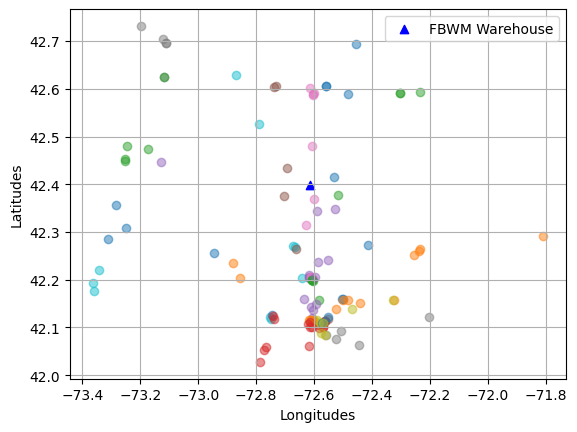

In [6]:
for cluster in clusters:
    X,Y = [],[]
    for i in cluster:
        pos  = get_location(i)
        X.append(pos[0])
        Y.append(pos[1])
    plt.scatter(X,Y, alpha=0.5)
plt.grid()
plt.scatter(longs[0], lats[0], color='blue', marker='^', label='FBWM Warehouse')
plt.legend()
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')

In [7]:
json.dump(clusters, open('./clusters.json', 'w'), indent=4)